# Bike share Demand Prediciton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/users/prave/datasets/csv files/Bike share demand.csv')

# Exploring dataset

In [3]:
print("data size: {}".format(df.shape))

data size: (10886, 12)


In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
df.isnull().sum().sort_values(ascending=False)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Exploratory Data Analysis

In [8]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [9]:
# convert "datetiem" column from object to tetimestamp datatype
df['datetime']=pd.to_datetime(df['datetime'])


df['month']=pd.to_datetime(df['datetime']).dt.month
df['hour']=pd.to_datetime(df['datetime']).dt.hour
df['weekofday']=pd.to_datetime(df['datetime']).dt.weekday

In [10]:
df.holiday.value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

In [11]:
# "Holiday" column is highly biased.
# so,let's drop the the "holiday" column
df.drop('holiday',axis=1,inplace=True)

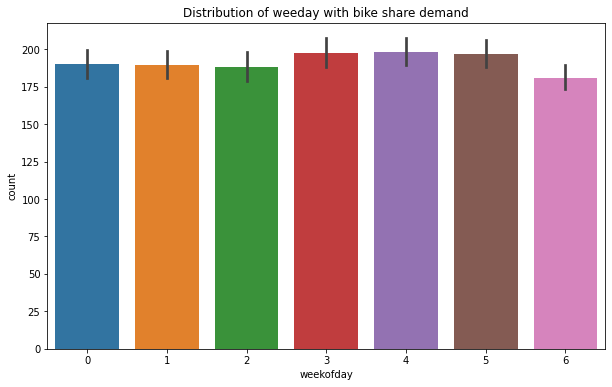

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekofday',y='count',data=df)
plt.title("Distribution of weeday with bike share demand")
plt.show()

* We do not see any big differences between **weekofday** for bike share counts.         

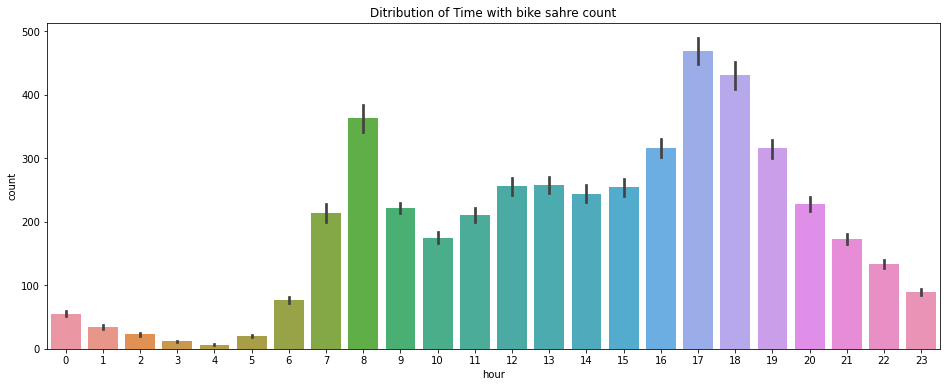

In [13]:
plt.figure(figsize=(16,6))
sns.barplot(x='hour',y='count',data=df)
plt.title("Ditribution of Time with bike sahre count")
plt.show()

* At **5:00 PM** has highest bike share demand.And followed by **6:00 PM**     


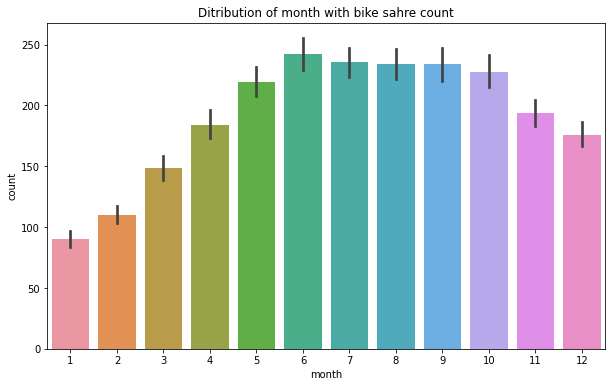

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='month',y='count',data=df)
plt.title("Ditribution of month with bike sahre count")
plt.show()

* **June** has highest bike sare demand.          
* from the above plot,as per our indian season  **Rainy** season has highest bike share count.

<AxesSubplot:xlabel='temp', ylabel='count'>

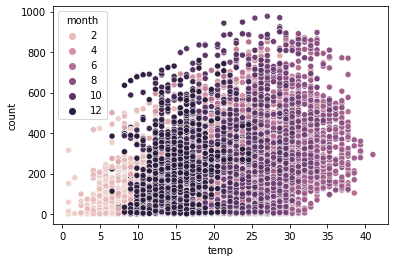

In [15]:
sns.scatterplot(x='temp',y='count',hue='month',data=df)

**Insight:**       
* As we can say that,**Temp** columns is not impacting too much for bike sahre count.

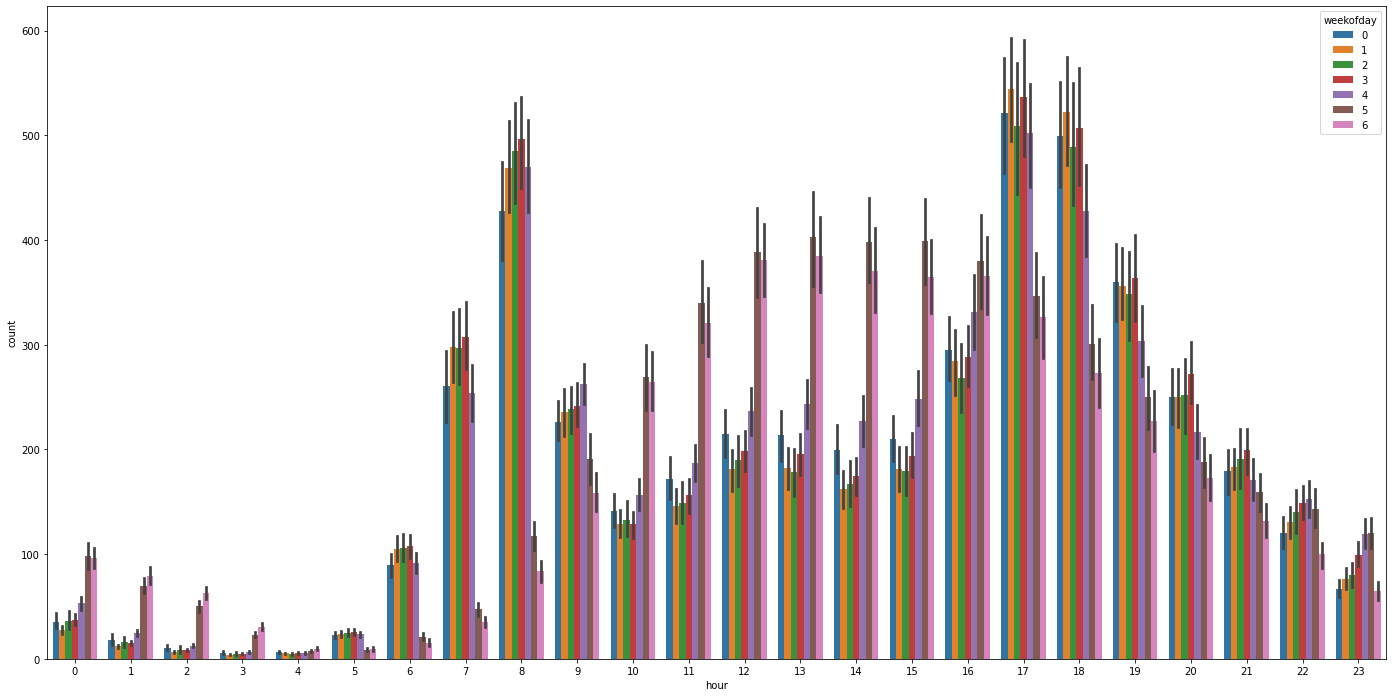

In [16]:
plt.figure(figsize=(24,12))
sns.barplot(x='hour',y='count',hue='weekofday',data=df)
plt.show()

**Insight:**          
* Weekend(friday and saturday) days are completly opposite bike sharing demand compared to rest of the days.i,e, vice versa

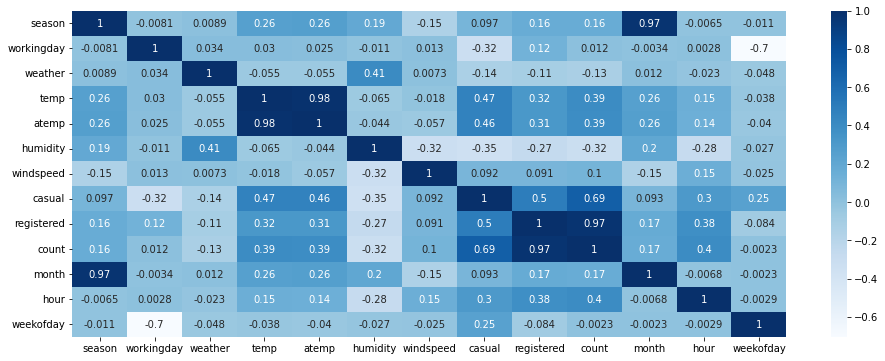

In [17]:
# Coorelation plot
plt.figure(figsize=(16,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

* From the above plot,
   * season & month,        
   * atemp & temp, and     
   * registered and count have high correlation 
* So,i decided to remove **Season,atemp,and registered** columns

In [18]:
# drop "season,datetime,atemp,and registered" columns
df.drop(['season','datetime','atemp','registered'],axis=1,inplace=True)

# model building

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [25]:
# split the dataset
X=df.drop(['count'],axis=1)
y=df['count']

In [38]:
# creating a function to find best algorithm for this problem
def find_best_model(X,y):
    models={'linearregreesion':{'model':LinearRegression(),'parameters':{'normalize':[True,False]}},
           'lasso':{'model':Lasso(),'parameters':{'alpha':[1,2],'selection':['random','cyclic']}},
           'randomforest':{'model':RandomForestRegressor(criterion='mse'),'parameters':{'n_estimators':[5,10,15,20,25]}},
           'xgb':{'model':XGBRegressor(),'parameters':{'max_depth':[1,3,5,7]}},
           'lgbm':{'model':LGBMRegressor(),'parameters':{'max_depth':[1,3,5,7],'n_jobs':[1,2,4,6]}}}
    scores=[]
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameters'],cv=5,return_train_score=False)
        gs.fit(X,y)
        scores.append({'model':model_name,
                     'best_parameters':gs.best_params_,
                     'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])
find_best_model(X,y)

,model,best_parameters,score
0,linearregreesion,{'normalize': True},0.383739
1,lasso,"{'alpha': 2, 'selection': 'cyclic'}",0.386541
2,randomforest,{'n_estimators': 20},0.630735
3,xgb,{'max_depth': 3},0.666162
4,lgbm,"{'max_depth': 3, 'n_jobs': 1}",0.671758


In [39]:
# split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [49]:
# Lightgbm
lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
lgb.score(X_test,y_test)

0.9302135028937463

In [42]:
# Linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6026561560981116

In [62]:
# Random Forest 
rgb=XGBRegressor()
rgb.fit(X_train,y_train)
rgb.score(X_test,y_test)

0.9297383232454564

# Prediction

In [46]:
X_train.head(2)

,workingday,weather,temp,humidity,windspeed,casual,month,hour,weekofday
365,0,1,9.02,37,16.9979,23,1,17,6
6898,1,1,20.50,31,7.0015,80,4,18,3


In [60]:
# prediction 1
print("Bike share demand:{}".format(int(lgb.predict([[1,3,35.5,18.3,9.68,90,1,6,1]])[0])))

Bike share demand:322


In [61]:
# prediction 2
print("Bike share demand:{}".format(int(lgb.predict([[0,4,20.5,8.3,19.68,9,7,3,7]])[0])))

Bike share demand:14
